In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

We first take a look at the data format as provided by the official site of bay area bike share program. The data set from the official site is divided by year. The first set of data contains data from 8/29/13 (system launch) to 2/28/14.

For each time period, there are 4 separate csv files:

1.Station information

In [3]:
stations = pd.DataFrame.from_csv('data/201402_babs_open_data/201402_station_data.csv', parse_dates=['installation'])
stations.head()

,name,lat,long,dockcount,landmark,installation
station_id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


2.Station status data: 
(Note that the status data file is quite large, we load only the first 1000 rows for now)

In [4]:
station_status = pd.read_csv('data/201402_babs_open_data/201402_status_data.csv', nrows=1000, index_col=None)
station_status.head()
# If chopping by chunk, use below
#chunksize = 10 ** 7
#for chunk in pd.read_csv('data/201402_babs_open_data/201402_status_data.csv', chunksize=chunksize):
#    print chunk.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


3.Trip data:

In [5]:
trips = pd.DataFrame.from_csv('data/201402_babs_open_data/201402_trip_data.csv', parse_dates=['Start Date', 'End Date'])
trips.head()

,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
Trip ID,,,,,,,,,,
4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


4.Weather data:

In [6]:
weather = pd.DataFrame.from_csv('data/201402_babs_open_data/201402_weather_data.csv', index_col=None)
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28.0,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35.0,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31.0,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29.0,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30.0,0,6,NaN,277,94107


## Station information
Let's start with some static information, e.g. station info 

Note: This could still potentially change (slowly) over time, as the program may adjust the stations according to the demand

Number of stations: 69


[<matplotlib.text.Text at 0x11646e550>, <matplotlib.text.Text at 0x113c93510>]

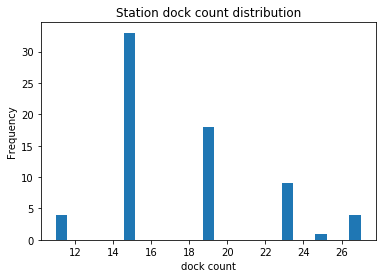

In [7]:
# station dock count histogram
print "Number of stations: " + str(len(stations))
ax = stations.dockcount.plot(kind='hist', bins=stations.dockcount.max())
ax.set(xlabel='dock count', title='Station dock count distribution')

landmark
Mountain View    None
Palo Alto        None
Redwood City     None
San Francisco    None
San Jose         None
dtype: object

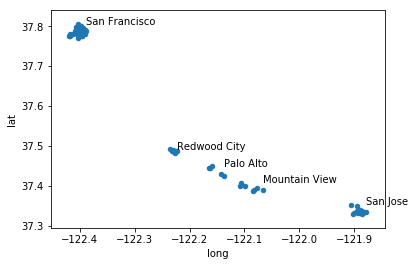

In [8]:
# Scatter plot showing station locations (using coordinates)
# We might be able to overlay on google map data for better visualization later
ax = stations.plot(x='long', y='lat', kind='scatter')
g = stations.groupby('landmark').agg('max')[['long', 'lat']]
def annotate_df(row):
    ax.annotate(row.name, xy=(row.long, row.lat), xytext=(row.long, row.lat))
g.apply(annotate_df, axis=1)

We may also visualize the station location on google map.

In [9]:
import os
import gmaps
gmaps.configure(api_key=os.environ["GOOGLE_MAP_API_KEY"])

In [10]:
loc = stations[['lat', 'long']].as_matrix()

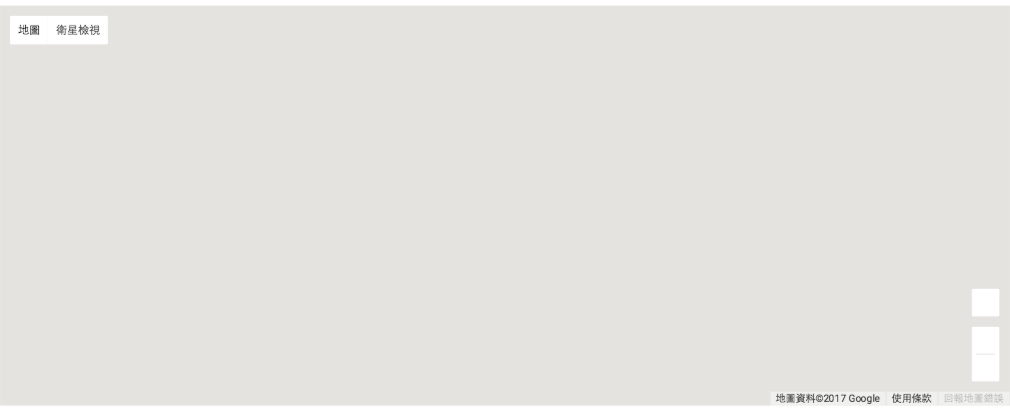

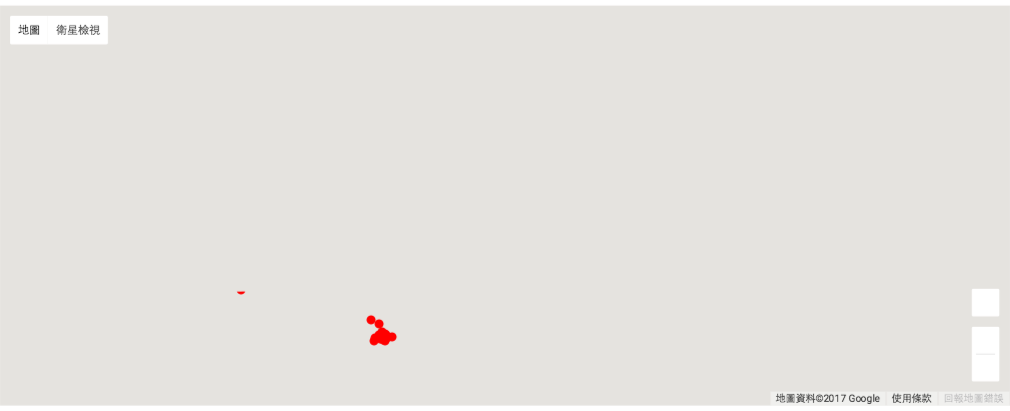

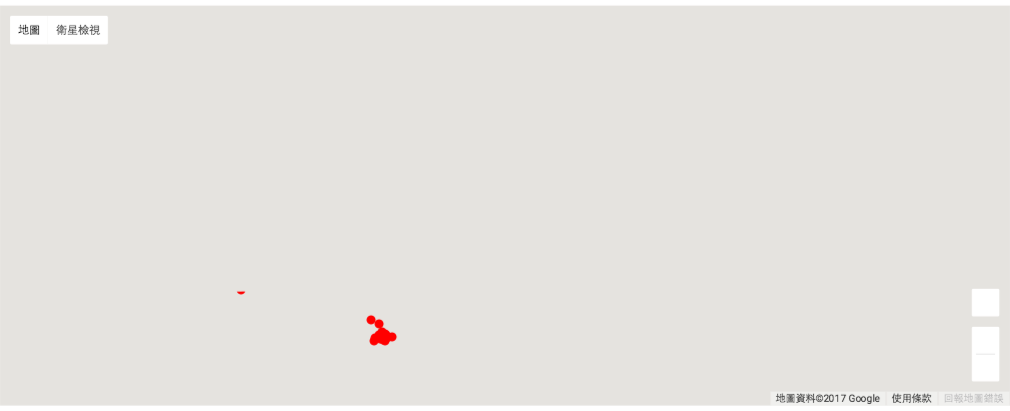

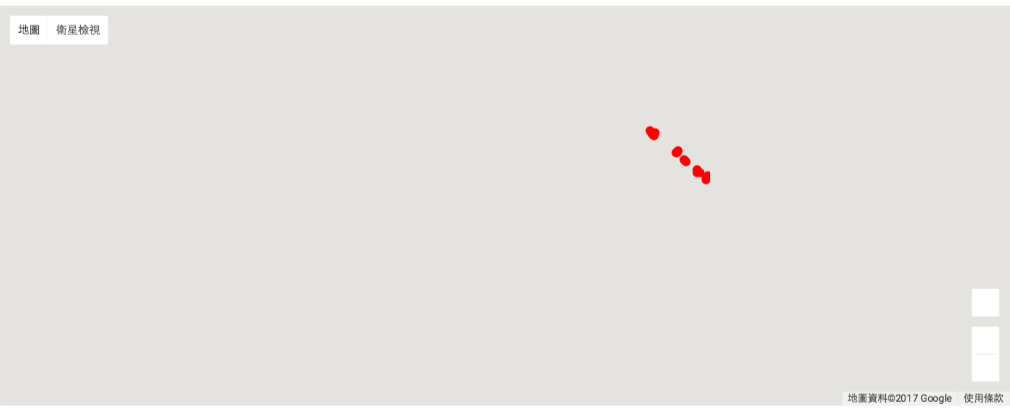

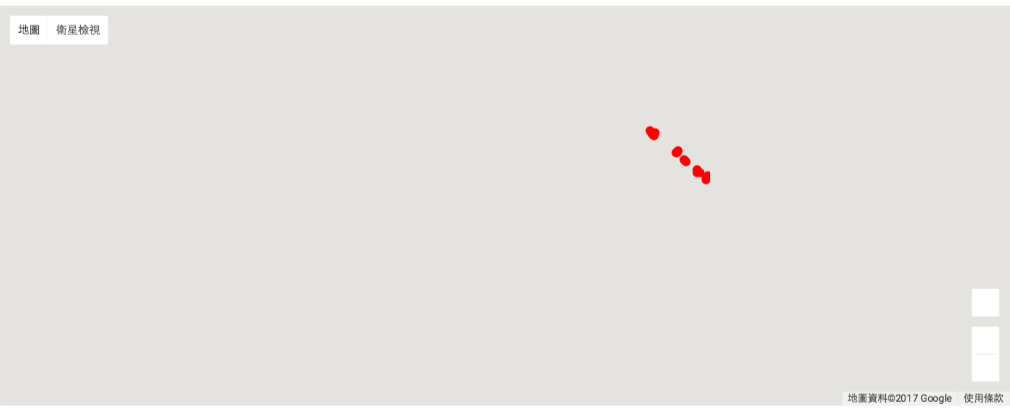

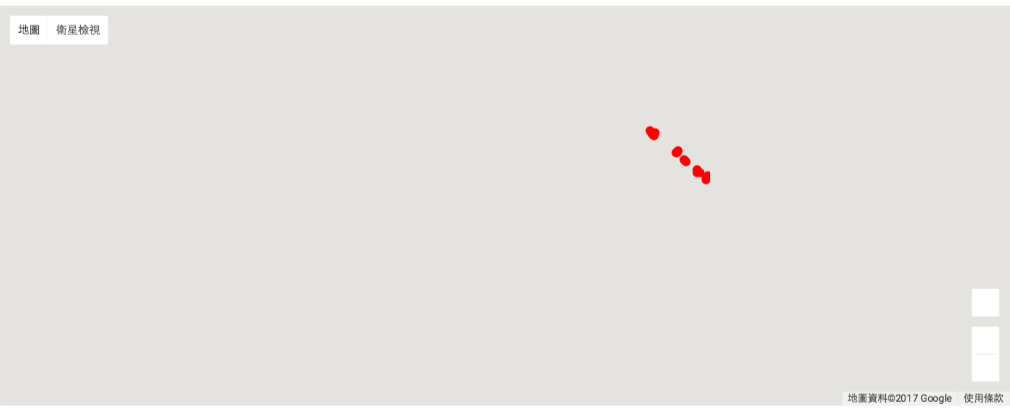

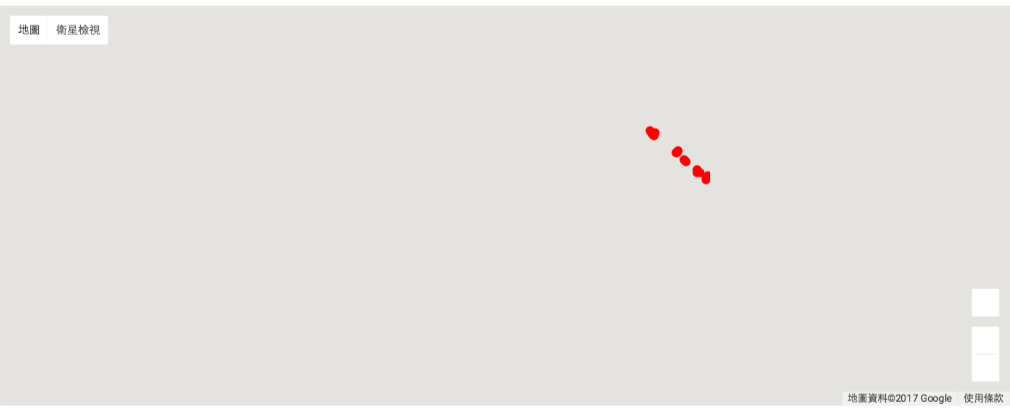

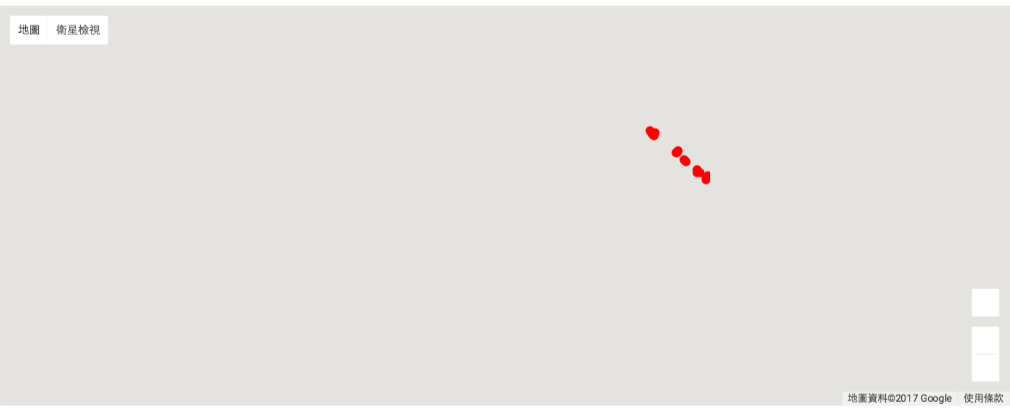

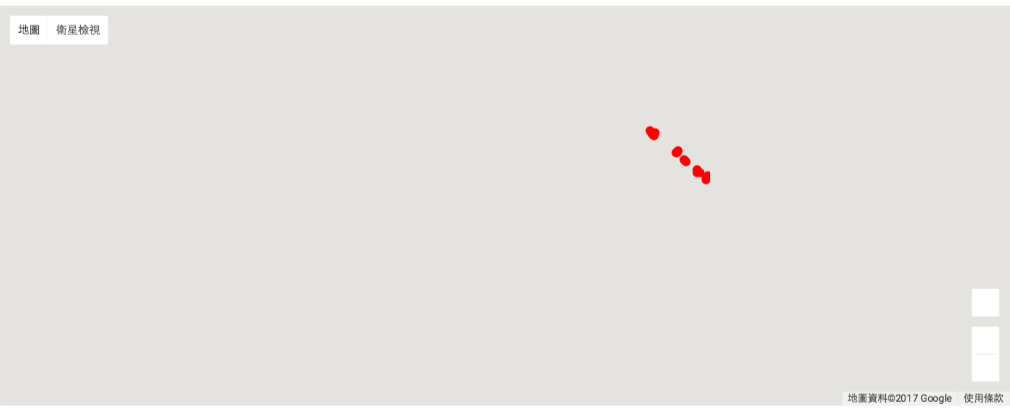

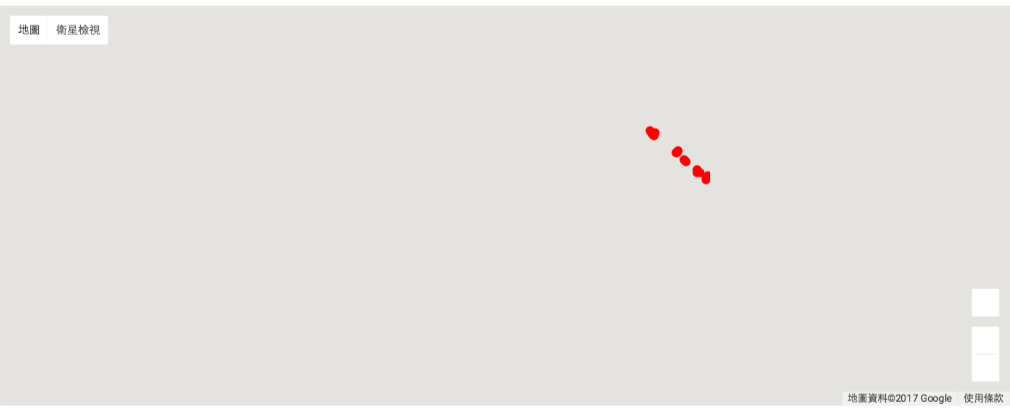

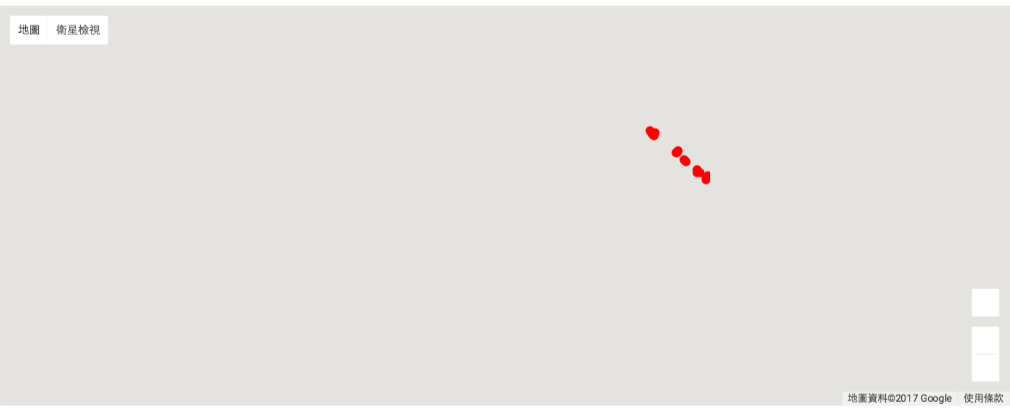

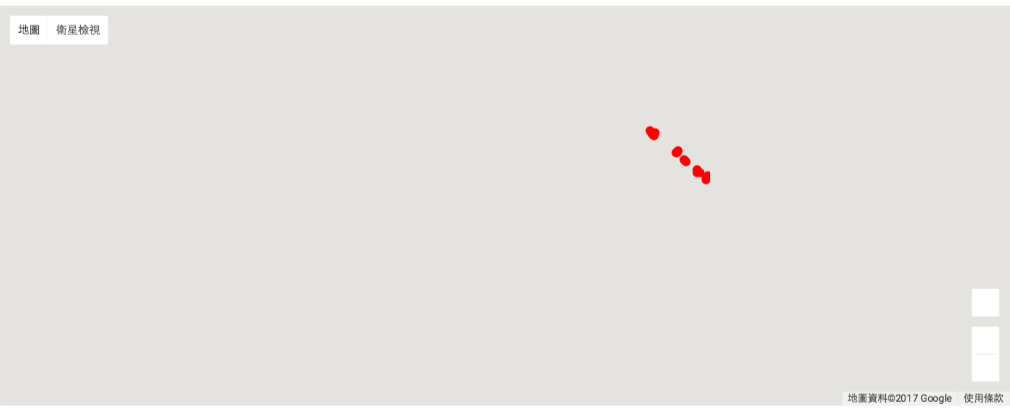

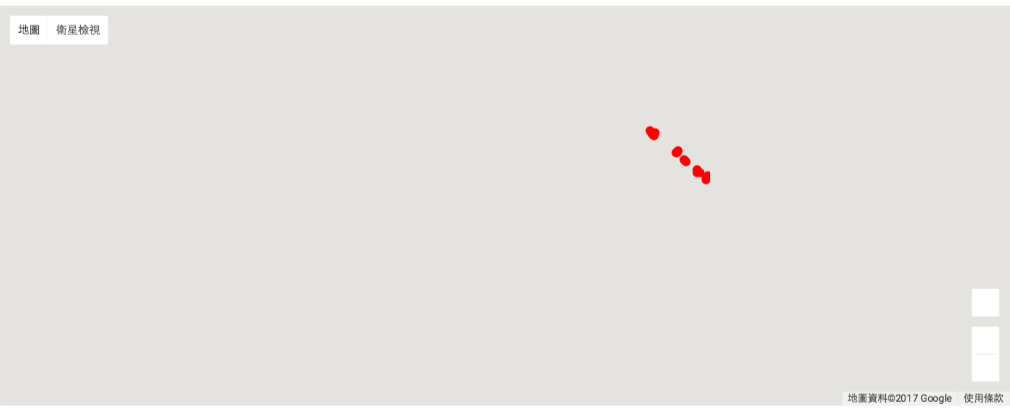

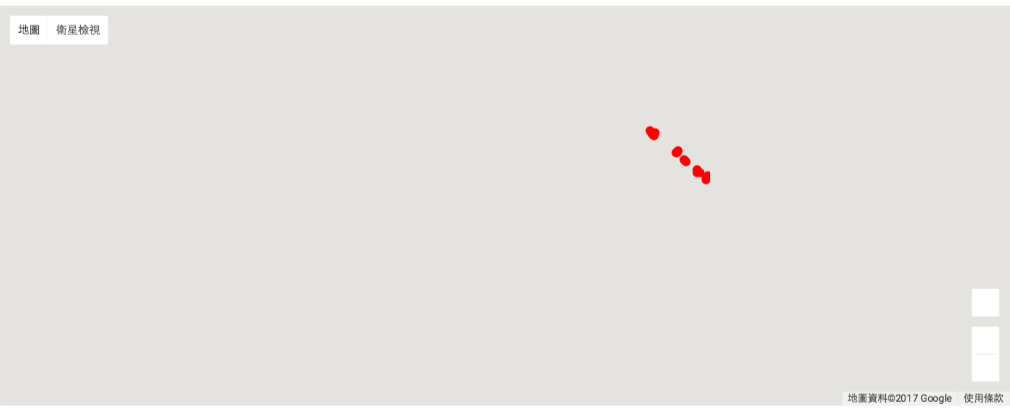

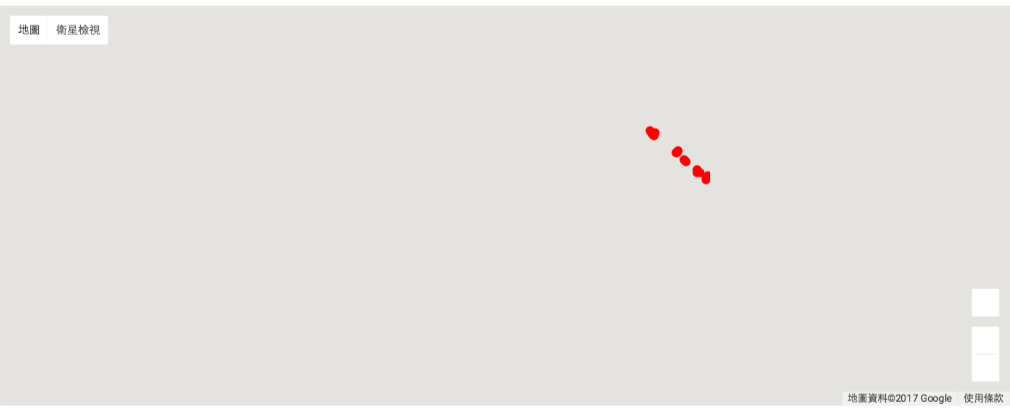

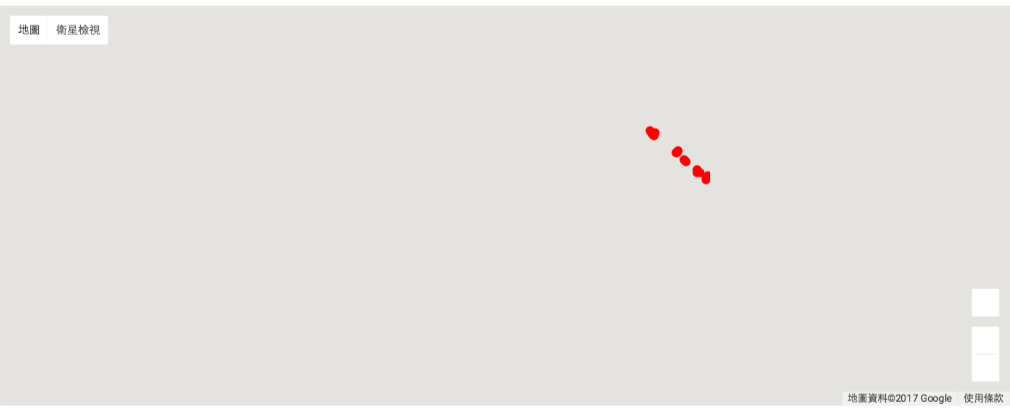

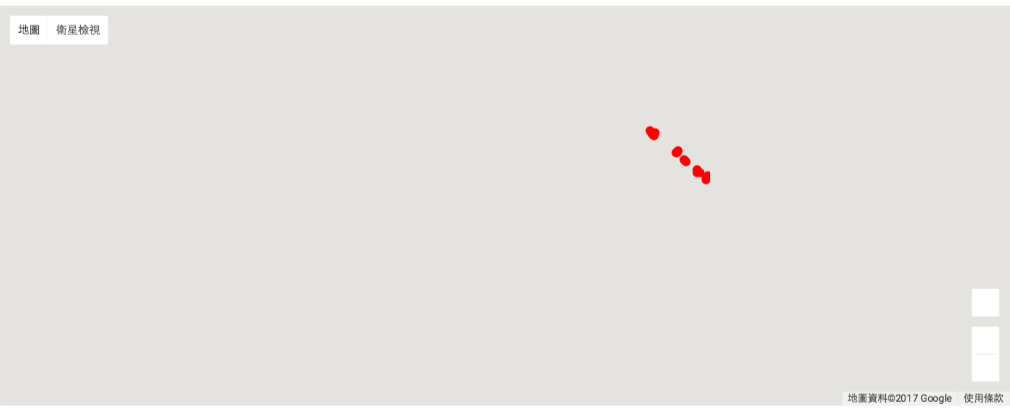

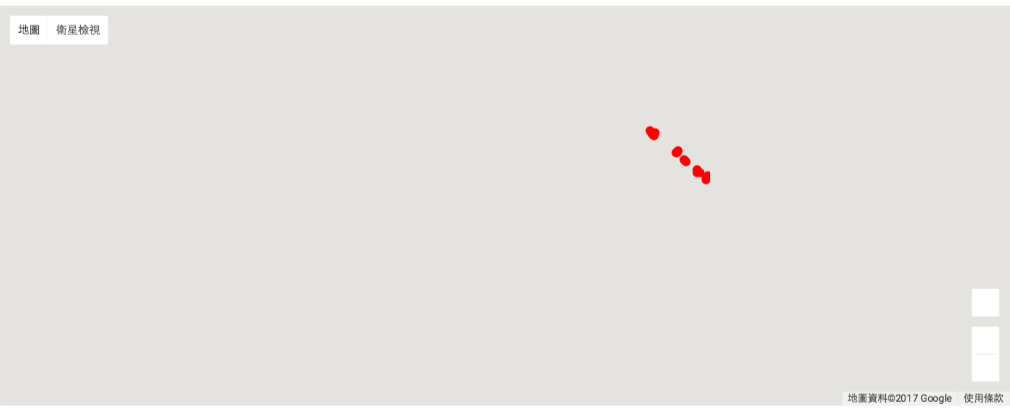

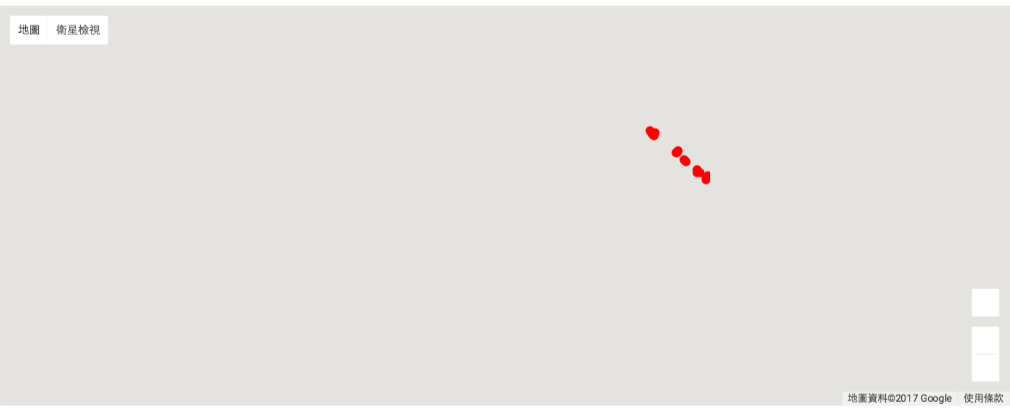

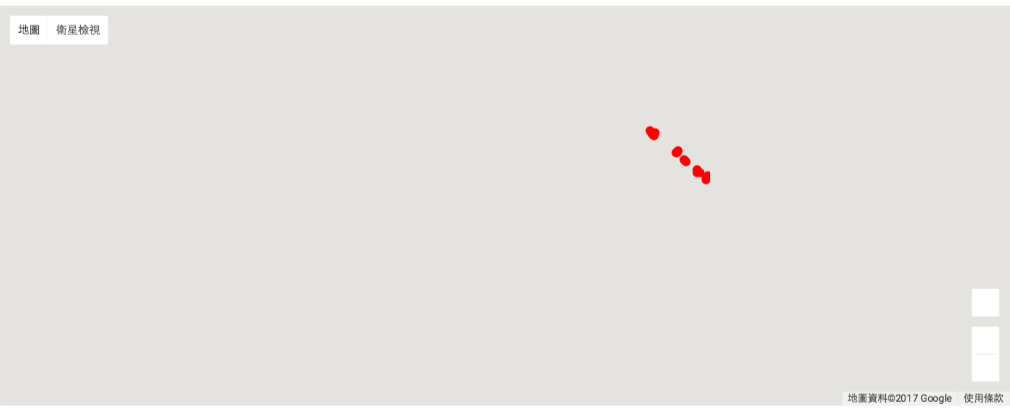

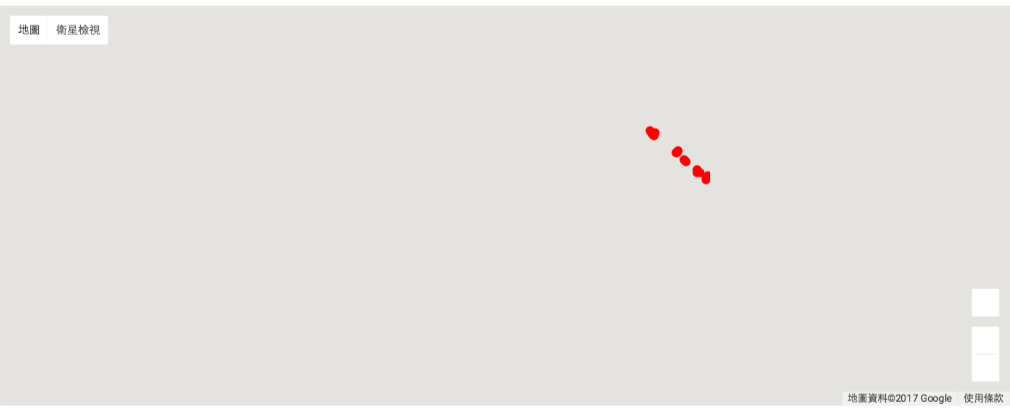

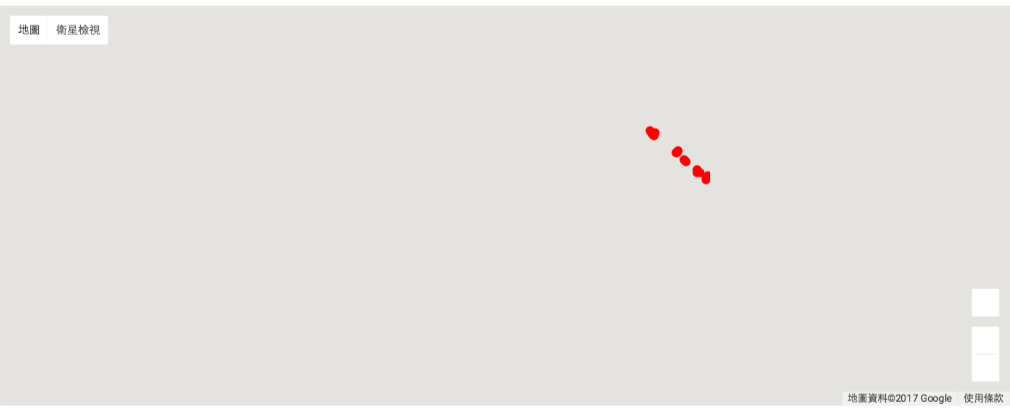

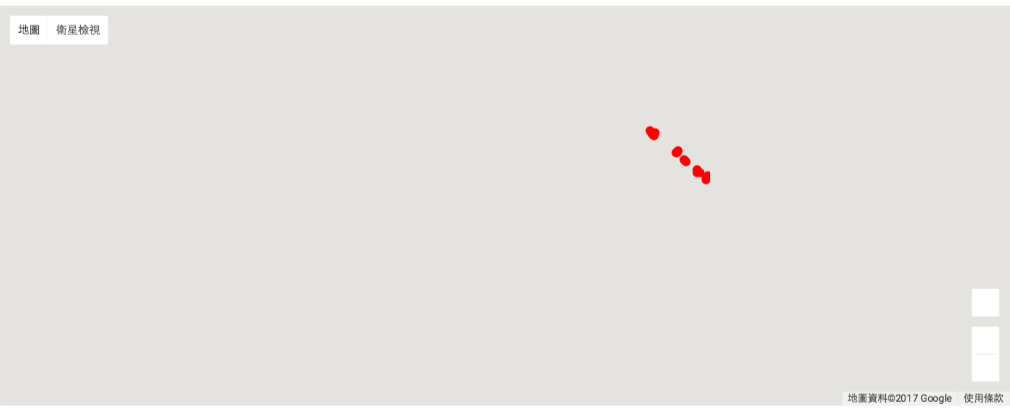

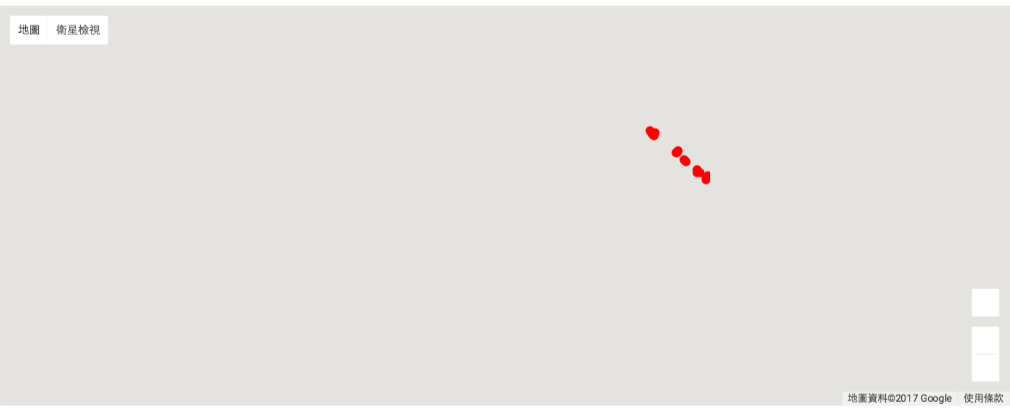

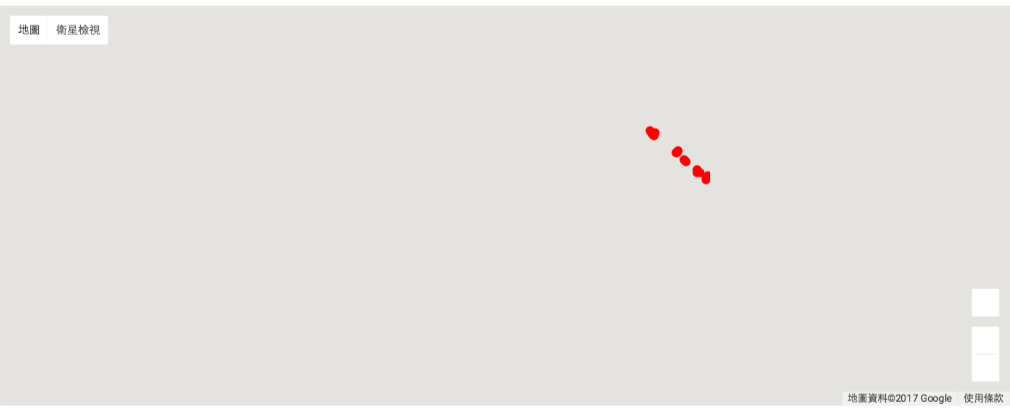

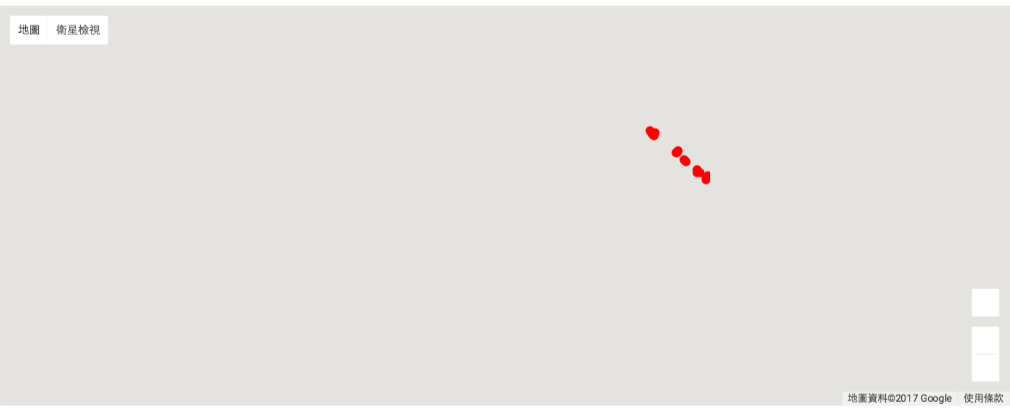

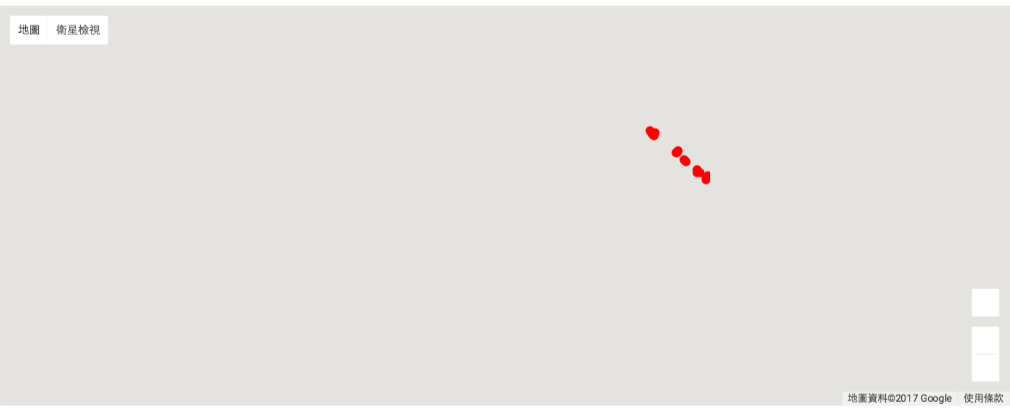

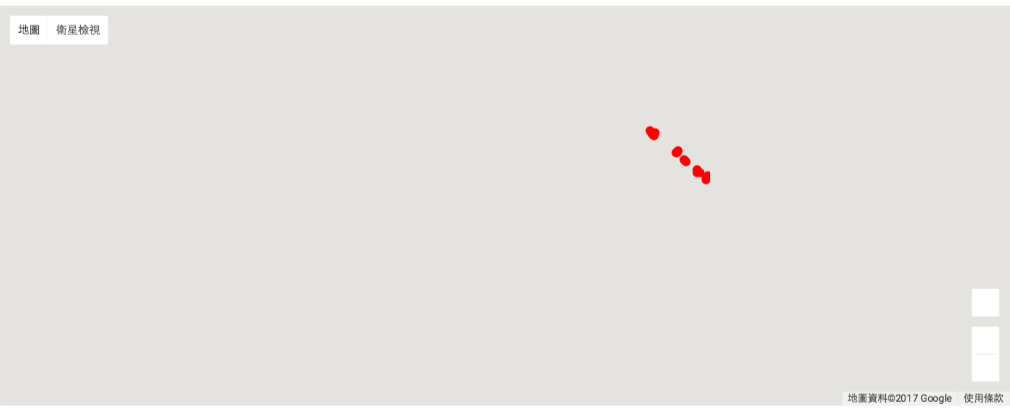

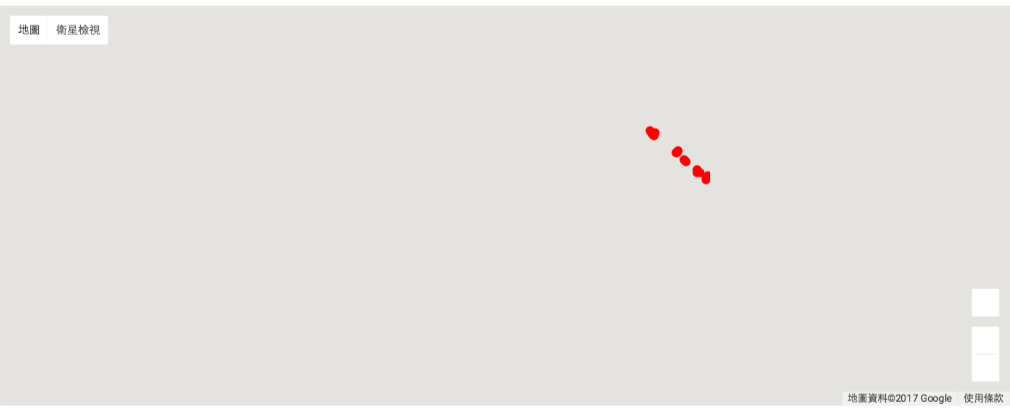

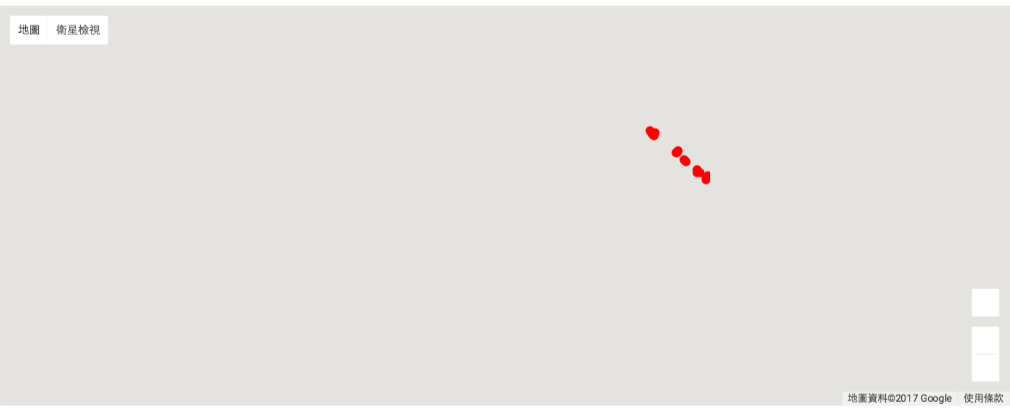

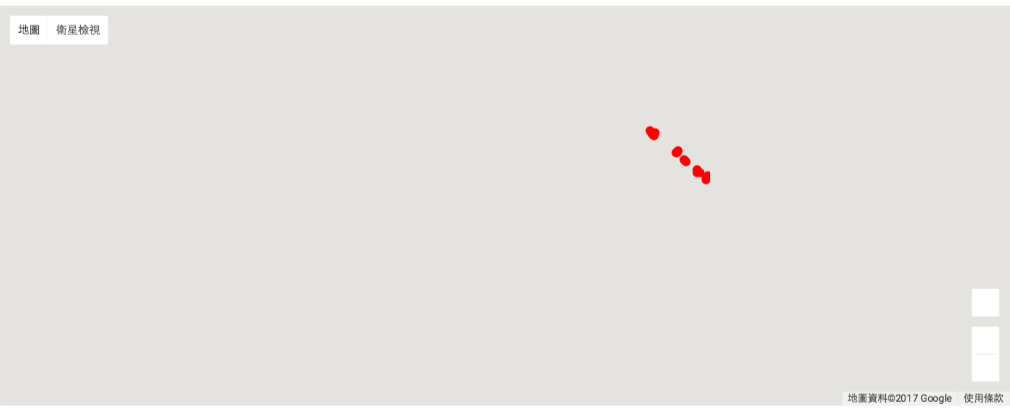

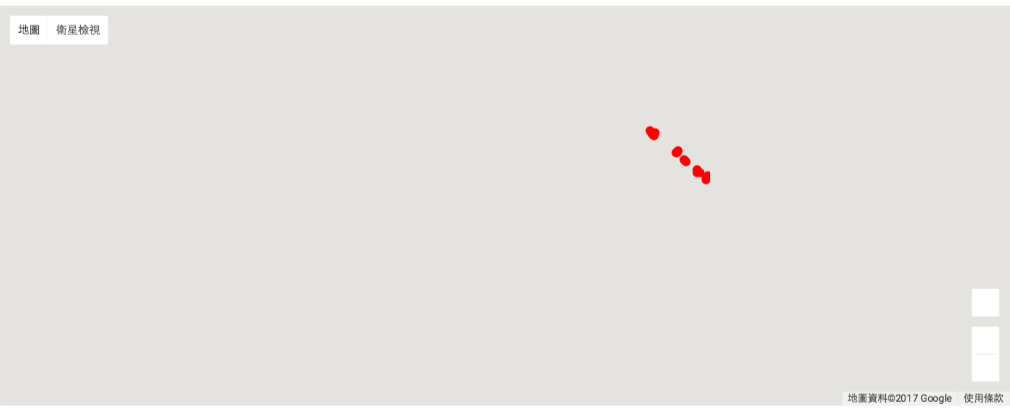

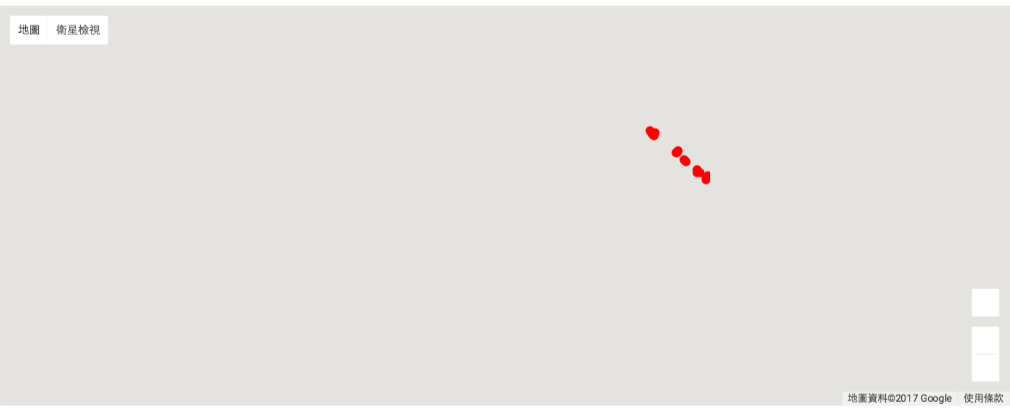

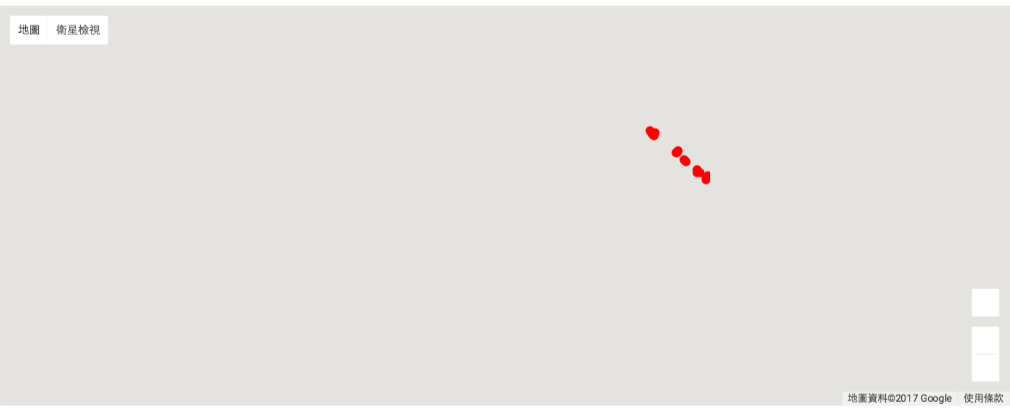

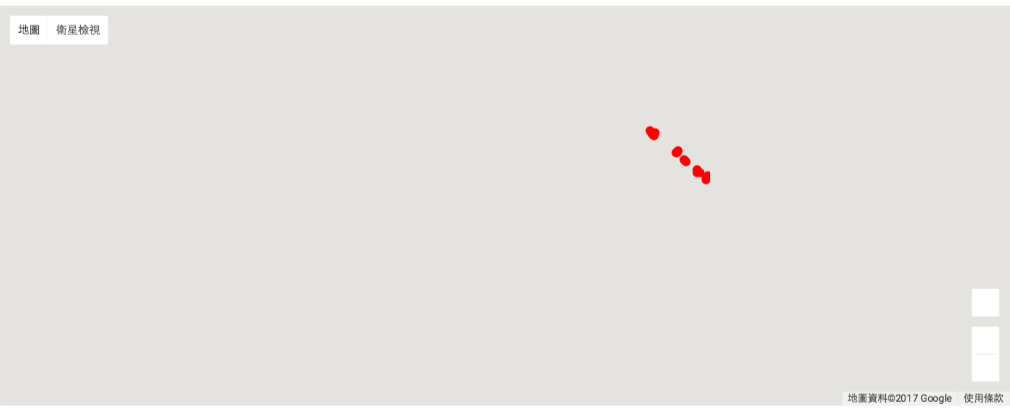

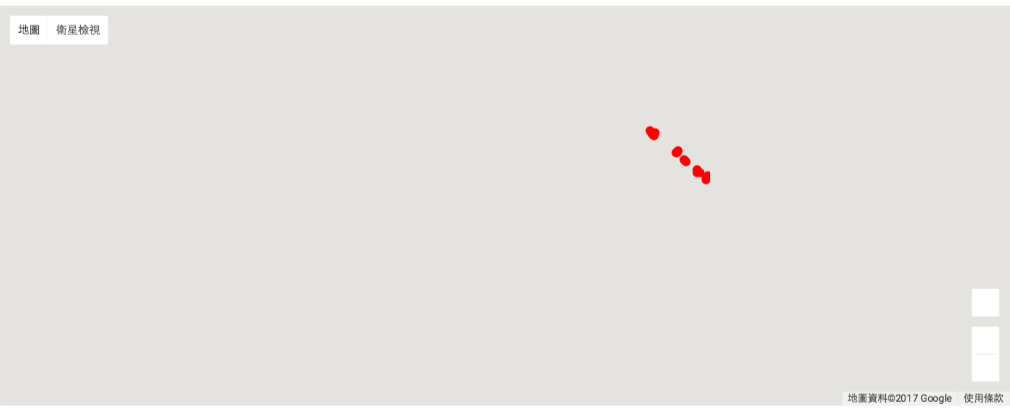

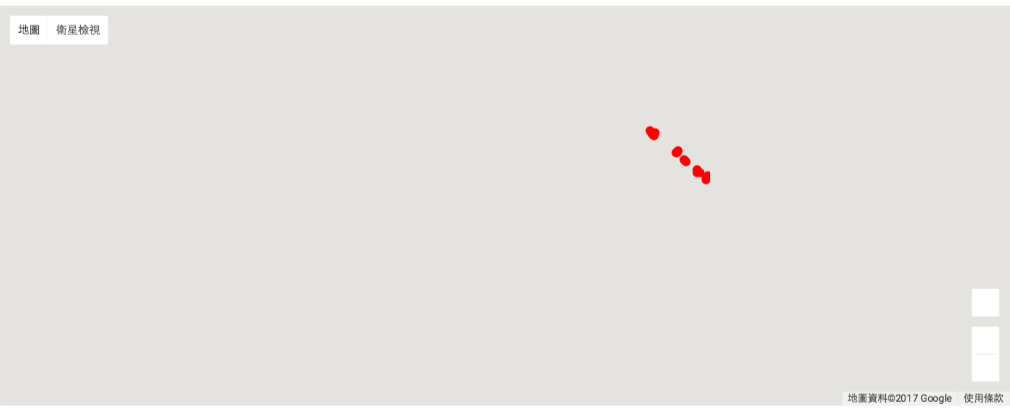

In [13]:
m = gmaps.Map()
loc_layer = gmaps.symbol_layer(loc, fill_color="red", stroke_color="red", scale=3)
m.add_layer(loc_layer)
m

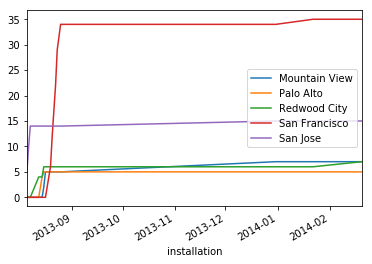

In [12]:
# Station installation history by area
temp = stations.groupby(['landmark', 'installation']).size()
temp = temp.unstack('landmark').fillna(0).cumsum(axis=0)
ax = temp.plot()
ax.legend(loc='right')

## Trip data

[<matplotlib.text.Text at 0x118e76750>, <matplotlib.text.Text at 0x11ad93150>]

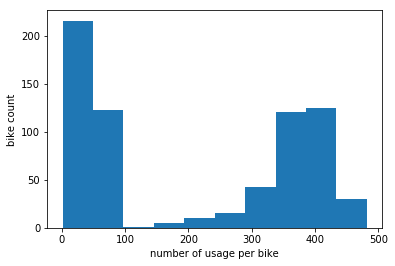

In [13]:
# Count the number of usage for each bike and plot the distribution
ax = trips['Bike #'].value_counts().plot(kind='hist')
ax.set(xlabel='number of usage per bike', ylabel='bike count')

We could see from above that the number of usage per bike could be roughly separated into two groups. In this case, these might be two groups of bikes that are activated at different times. (* Requires further verification)

A related question we may ask is that:

Are there specific set of bicycles that are used more often than others? If so, is it because they are usually located at popular stations (or other reasons)?

This question may be relevant to the maintenance, as the number of usage may be related to the chance of malfunctioning.

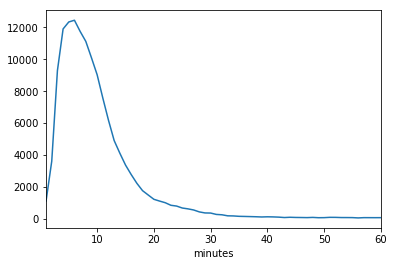

In [14]:
# Trip time distribution
#tripTime = (trips['End Date'] - trips['Start Date']).dt.total_seconds() / 60  # in minutes
tripTime = trips.Duration // 60  # in minutes
ax = tripTime[tripTime <= 60].value_counts().sort_index().plot()
ax.set(xlabel='minutes')

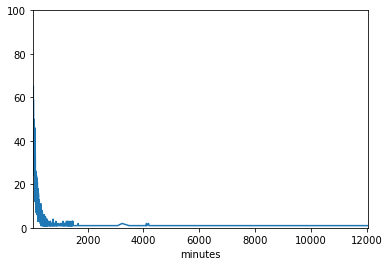

In [15]:
# After 60 mins
ax = (tripTime[tripTime > 60]).value_counts().sort_index().plot(ylim=[0, 100])
ax.set(xlabel='minutes')

We could see that the majority of travel time of each trip is within 30 mins. This may be due to the pricing plan (overtime fee after 30 mins).

It may also be interesting to see the trip time distribution between different user (subsciption) types.

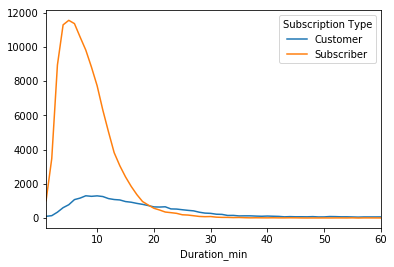

In [16]:
# Trip time distribution by subscription type (not normalized)
trips['Duration_min'] = trips.Duration // 60
t = trips.groupby(['Duration_min', 'Subscription Type']).size().unstack('Subscription Type')
t.head(60).plot()

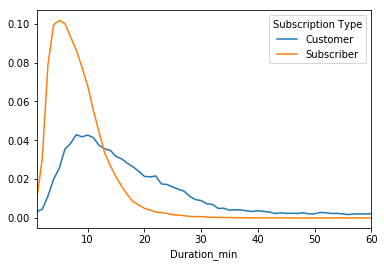

In [17]:
# Trip time distribution by subscription type (normalized)
t.Customer = t.Customer / t.Customer.sum()
t.Subscriber = t.Subscriber / t.Subscriber.sum()
t.head(60).plot()

From the trip data, we may characterize the popularity of the stations

In [18]:
# Top 10 start stations
trips.groupby(['Start Terminal', 'Start Station']).size().sort_values(ascending=False).head(10)

Start Terminal  Start Station                                
70              San Francisco Caltrain (Townsend at 4th)         9838
50              Harry Bridges Plaza (Ferry Building)             7343
60              Embarcadero at Sansome                           6545
77              Market at Sansome                                5922
55              Temporary Transbay Terminal (Howard at Beale)    5113
76              Market at 4th                                    5030
61              2nd at Townsend                                  4987
69              San Francisco Caltrain 2 (330 Townsend)          4976
74              Steuart at Market                                4913
65              Townsend at 7th                                  4493
dtype: int64

In [19]:
# Top 10 end stations
trips.groupby(['End Terminal', 'End Station']).size().sort_values(ascending=False).head(10)

End Terminal  End Station                             
70            San Francisco Caltrain (Townsend at 4th)    11637
60            Embarcadero at Sansome                       7590
50            Harry Bridges Plaza (Ferry Building)         7475
77            Market at Sansome                            6238
61            2nd at Townsend                              5655
69            San Francisco Caltrain 2 (330 Townsend)      5112
76            Market at 4th                                5109
74            Steuart at Market                            5080
65            Townsend at 7th                              5073
64            2nd at South Park                            4431
dtype: int64

*Note: We may further combine google map data to explain the popularity of stations.

## Station bike / dock availability

Using the station status data, we may check the bike/dock availability for each station. The data contains the availability information with precision up to minutes.

We first arbitrarily select one station.

In [48]:
station_status = pd.read_csv('data/201402_babs_open_data/201402_status_data.csv')
station2_bike = station_status[station_status.station_id == 2][['bikes_available', 'time']]

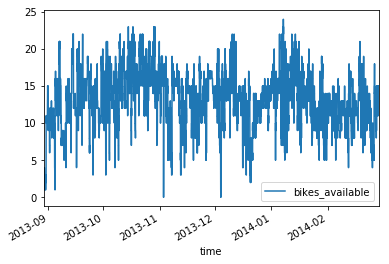

In [64]:
station2_bike.time = pd.to_datetime(station2_bike.time)
station2_bike.plot(x='time', y='bikes_available')

In [50]:
station2_bike[station2_bike.bikes_available == 0].shape

(74, 2)

In [65]:
station2_bike.shape

(260491, 2)

The total time duration of empty bike at station 2 is only 74 minutes (within a half-year time frame), which could be considered pretty nice

In [51]:
# Total time duration that a station has no bikes available
station_status[station_status.bikes_available == 0].shape

(86389, 4)

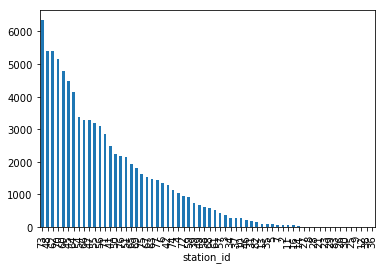

In [60]:
# Distribution of the total time duration where no bikes are available
zero_bike = station_status[station_status.bikes_available == 0]
zero_bike.groupby('station_id').size().sort_values(ascending=False).plot(kind='bar')

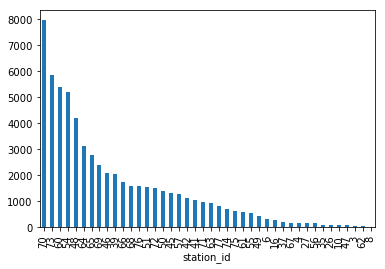

In [61]:
# Distribution of the total time duration where no docks are available
zero_dock = station_status[station_status.docks_available == 0]
zero_dock.groupby('station_id').size().sort_values(ascending=False).plot(kind='bar')

## Questions (unresolved)
Here we summarize some questions that occurred when performing the analysis, which may worth more exploration:

+ Comparing the station location and the current station map (on official website), it seems that some stations are closed now. What are the possible reasons for the shutdown?